In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('C:/Users/SudeepSN/student_performance/Algerian_forest_fires_dataset_UPDATE.csv',header = 1)

In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [10]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


#Attribute Information :-

#Period Covered

#Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
#Weather data observations

Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
RH : Relative Humidity in %: 21 to 90
Ws :Wind speed in km/h: 6 to 29
Rain: total day in mm: 0 to 16.8
FWI Components

Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
Drought Code (DC) index from the FWI system: 7 to 220.4
Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
Buildup Index (BUI) index from the FWI system: 1.1 to 68
Fire Weather Index (FWI) Index: 0 to 31.1

In [11]:
df.shape

(246, 14)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [ ]:
#CHECKING THE NULL VALUES

In [14]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [ ]:
#OBSERVATION OF STATISTICAL INFO

In [19]:
df.describe().T

,count,unique,top,freq
day,246,33,01,8
month,245,5,07,62
year,245,2,2012,244
Temperature,245,20,35,29
RH,245,63,64,10
Ws,245,19,14,43
Rain,245,40,0,133
FFMC,245,174,88.9,8
DMC,245,167,7.9,5
DC,245,199,8,5


In [21]:
df.iloc[120:125,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [22]:
#We see that we require some data cleaning operations to be performed

In [23]:
2#DATA CLEANING

WE NEED TO DROP THE 122 AND 124TH ROW WHICH IS RESPECIFYING THE HEADERS

In [24]:
df.drop([122,123],inplace = True)

Resetting the index column


In [25]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [28]:
#Creating a new column called Region reprenting [0= Bejaia and 1 =Sidi Bel-abbes]

In [29]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [31]:
#checking out all the column names

In [32]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [35]:
df.dropna(inplace=True)

In [37]:
#Converting the necssary datatype to integer if the data type is 'String'

In [38]:
df.dtypes

day             object
month           object
year            object
Temperature     object
 RH             object
 Ws             object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object
Region         float64
dtype: object

In [60]:
df[['day', 'month', 'year', 'Temperature',' RH', ' Ws',"Region"]]=df[['day', 'month', 'year', 'Temperature',' RH', ' Ws',"Region"]].astype(int)

In [57]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [61]:
#converting necessary datatypes to float

In [65]:
df[['Rain ', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain ', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype('float')

In [64]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [66]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
 RH              int32
 Ws              int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int32
dtype: object

In [67]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [68]:
#we need to drop the year column as all the values are same which may not be neccessary for EDA

In [70]:
df = df.drop(['year'],axis = 1)

In [71]:
df

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [74]:
#statistical observation
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4
ISI,243.0,4.742387,4.154234,0.0,1.40,3.5,7.25,19.0


In [ ]:
#3.EXPLORATIORY DATA ANALYSIS

In [77]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [79]:
df.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
day,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.000821
month,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.001857
Temperature,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.269555
RH,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.402682
Ws,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.181160
Rain,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.040013
FFMC,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.222241
DMC,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.192089
DC,0.527952,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.078734
ISI,0.180543,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.263197


<AxesSubplot:>

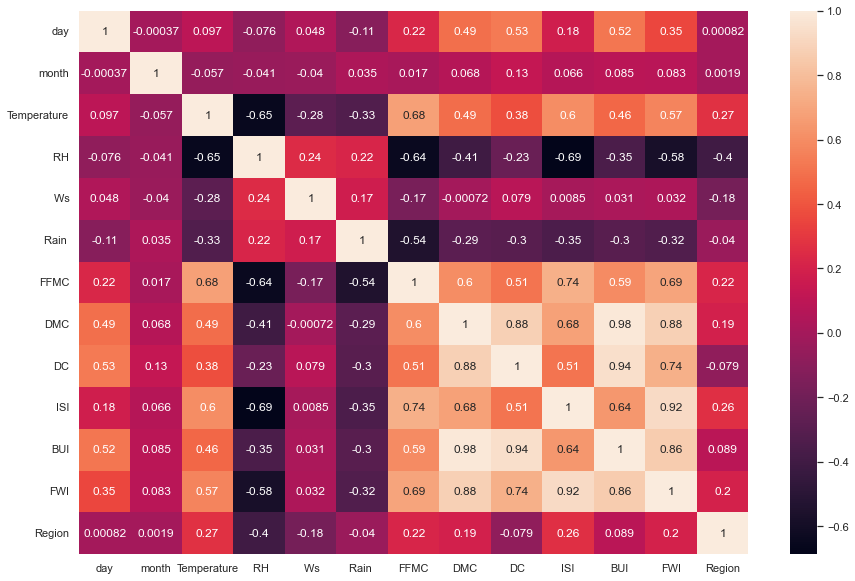

In [86]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(),annot = True)

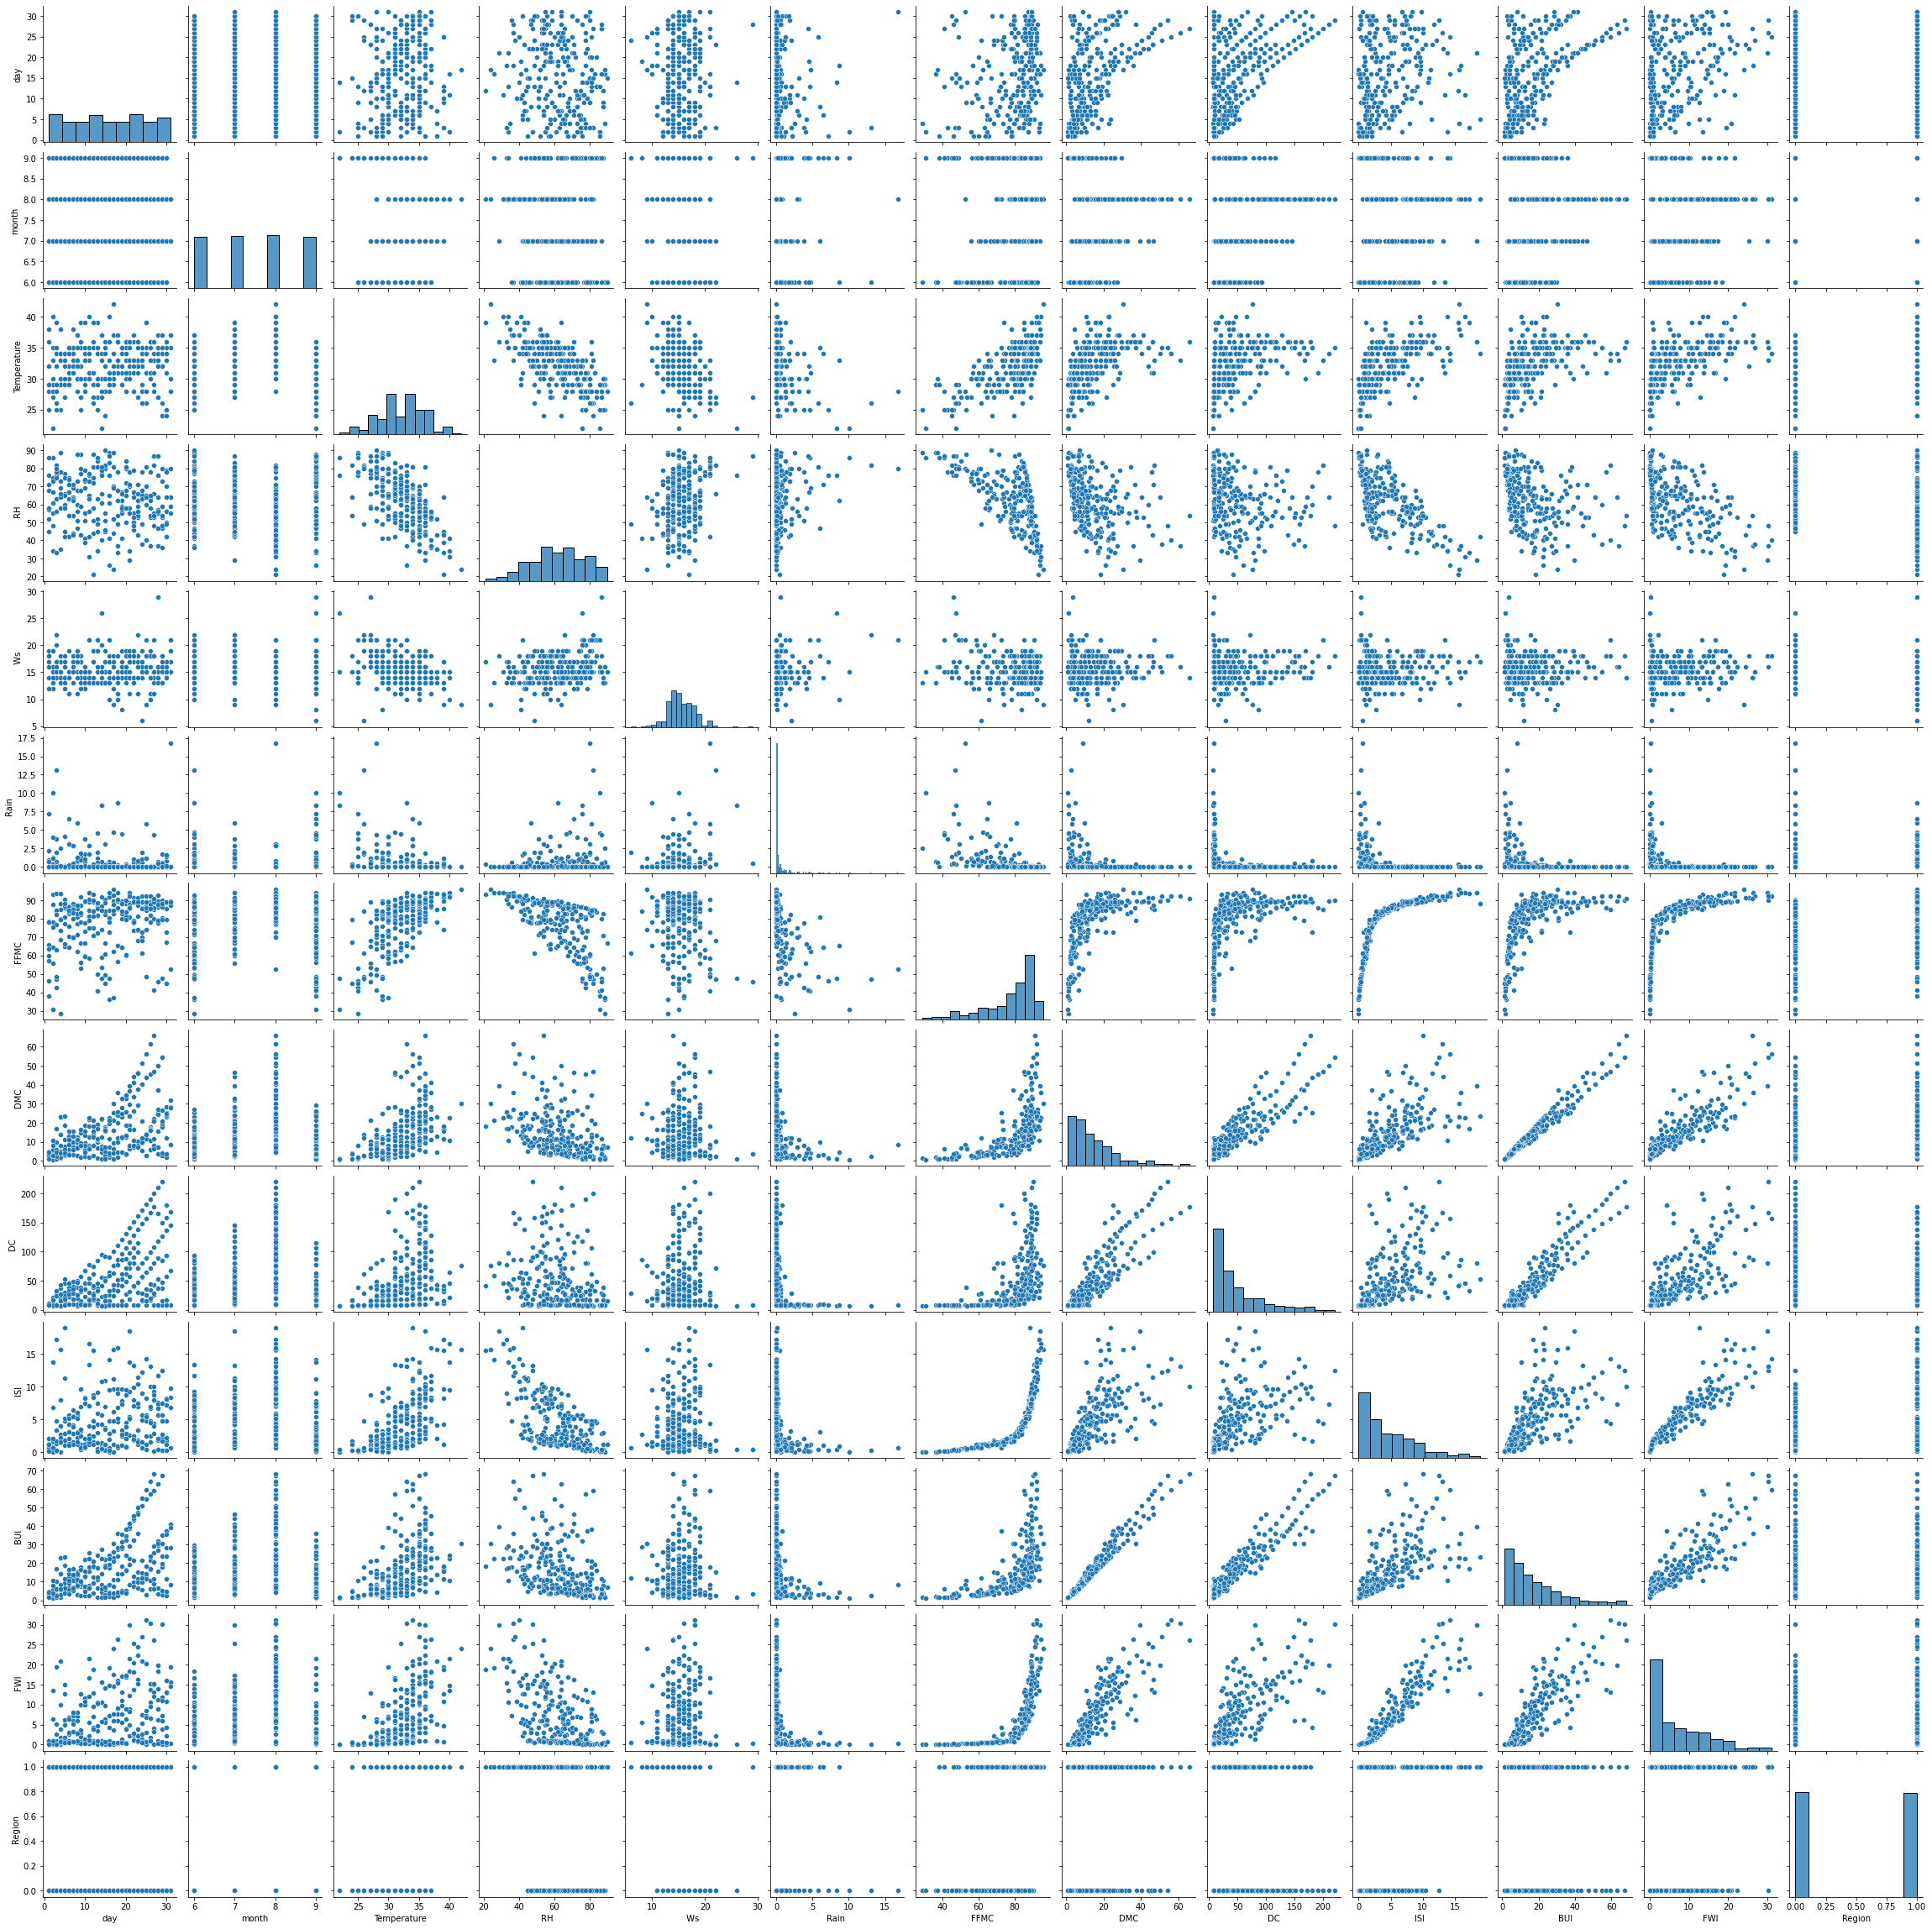

In [85]:
sns.pairplot(df)

Text(0, 0.5, 'Temperature')

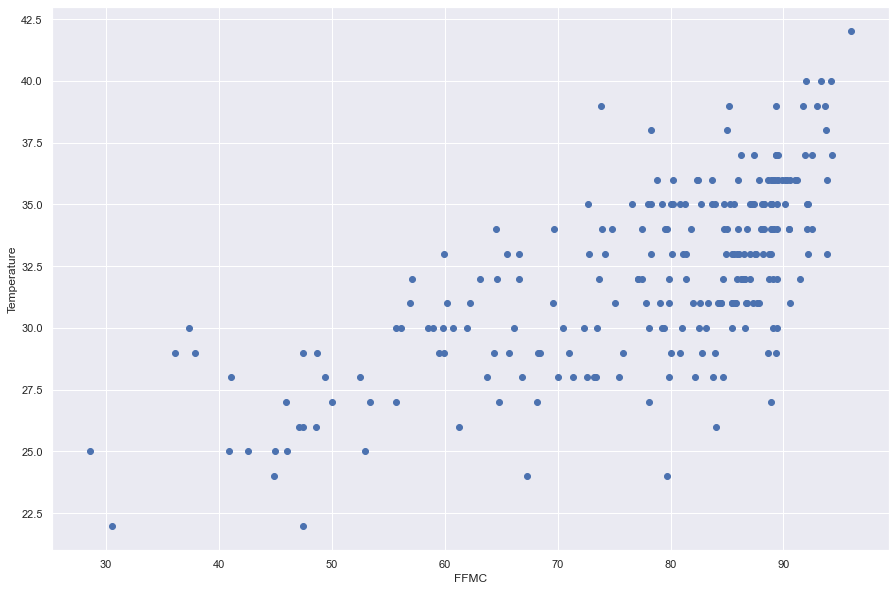

In [90]:
plt.scatter(df['FFMC'],df['Temperature'])
plt.xlabel("FFMC")
plt.ylabel("Temperature")

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

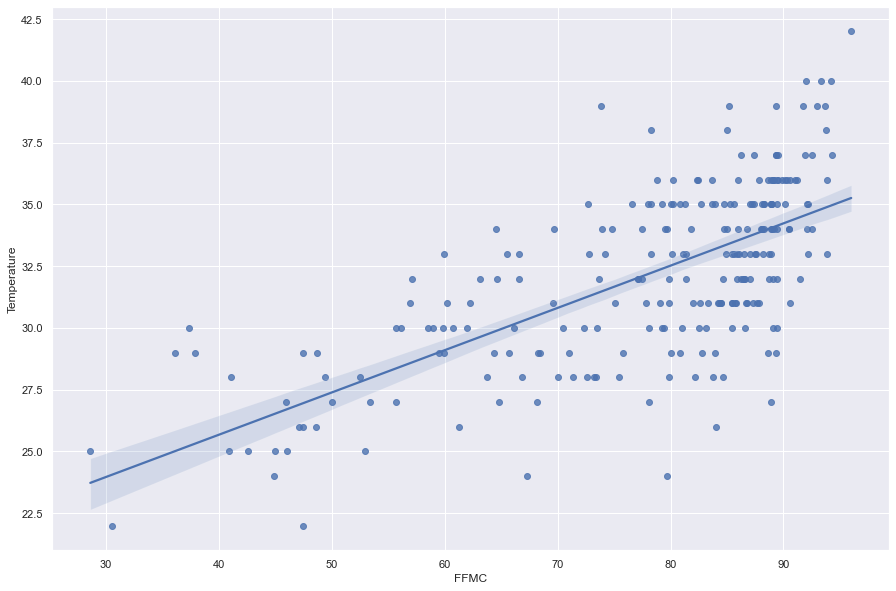

In [91]:
sns.regplot(x='FFMC',y='Temperature',data=df)

Text(0, 0.5, 'Temperature')

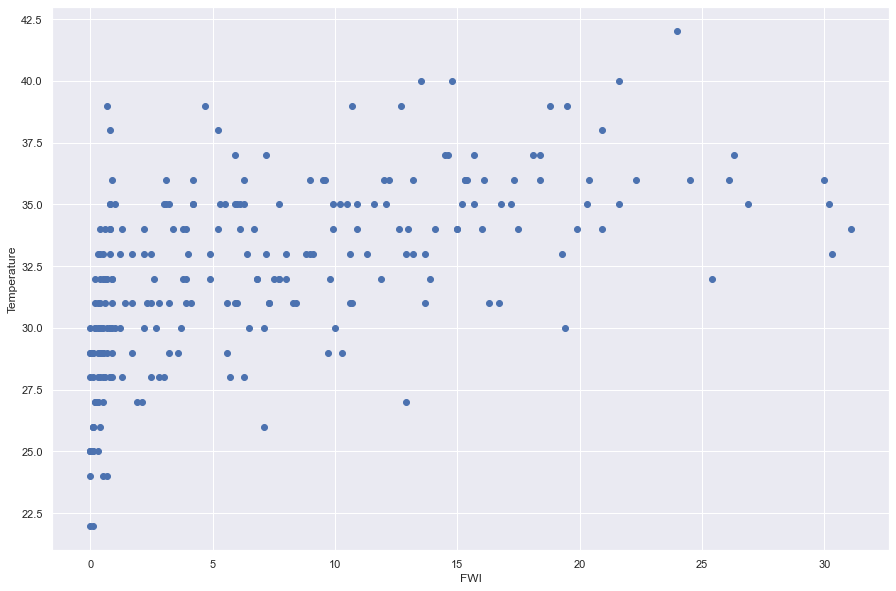

In [93]:
plt.scatter(df['FWI'],df['Temperature'])
plt.xlabel("FWI")
plt.ylabel("Temperature")

C:\Users\SudeepSN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature'>

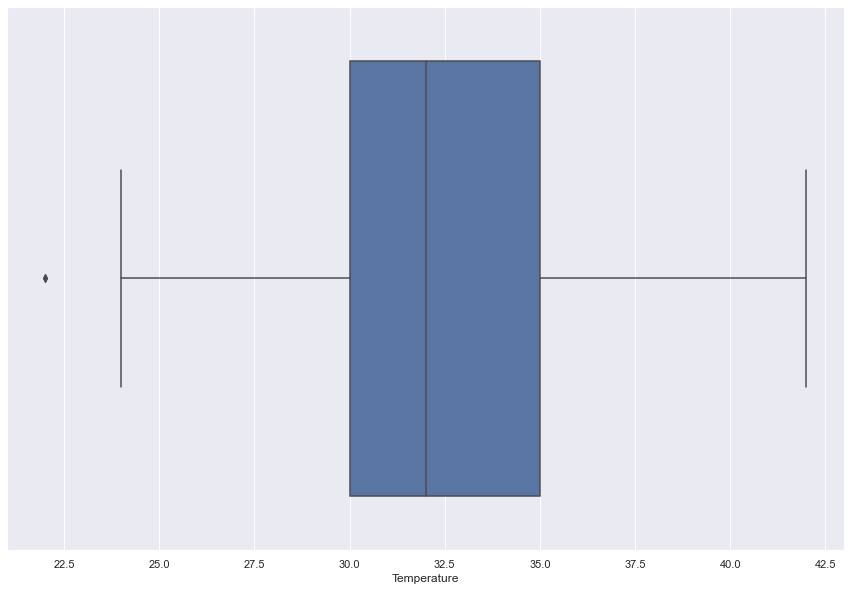

In [103]:
sns.boxplot(df['Temperature'])

In [96]:
df.columns

Index(['day', 'month', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC',
       'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

C:\Users\SudeepSN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FWI'>

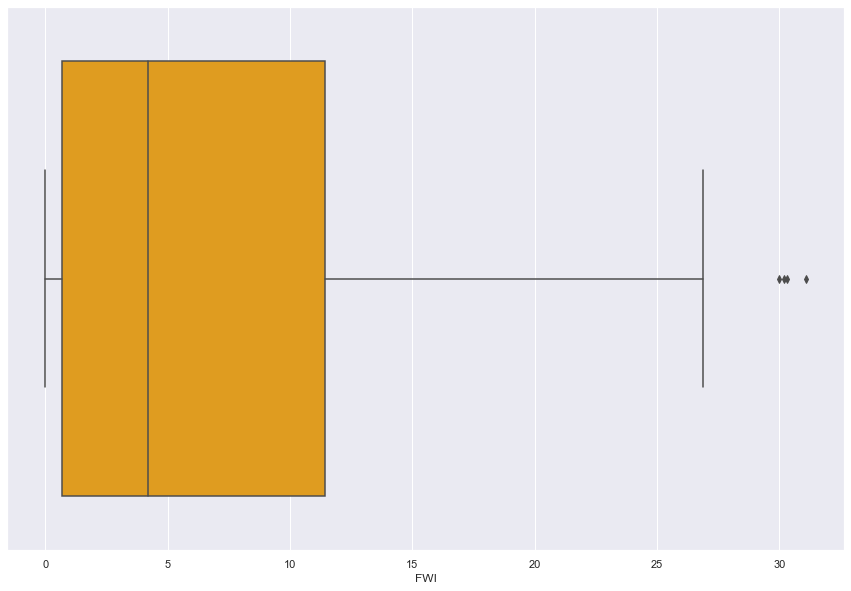

In [104]:
sns.boxplot(df['FWI'],color='orange')

In [105]:
#4:BUILDING LINEAR REGRESSION MODEL

In [106]:
df

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [110]:
X= df.drop(['Temperature'],axis = 1)

In [111]:
X

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
240,27,9,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
241,28,9,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,9,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [112]:
y = df['Temperature']

In [113]:
y

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 243, dtype: int32

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=10)

In [116]:
X_train

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
25,26,6,64,18,0.0,86.8,17.8,71.8,6.7,21.6,10.6,fire,0
121,30,9,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire,0
174,23,7,71,17,0.0,87.3,46.6,99.0,6.9,46.5,16.3,fire,1
72,12,8,51,13,0.3,81.3,15.6,75.1,2.5,20.7,4.2,not fire,0
186,4,8,35,15,0.0,93.8,23.0,42.7,15.7,22.9,20.9,fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,4,8,69,13,0.0,85.0,8.2,19.8,4.0,8.2,3.9,fire,0
15,16,6,89,13,0.7,36.1,1.7,7.6,0.0,2.2,0.0,not fire,0
229,16,9,26,13,0.0,93.9,21.2,59.2,14.2,22.4,19.3,fire,1
125,4,6,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,1


In [117]:
y_train

25     31
121    25
174    31
72     35
186    38
       ..
64     34
15     29
229    33
125    30
9      28
Name: Temperature, Length: 162, dtype: int32

In [118]:
#SHAPES

In [119]:
X_train.shape

(162, 13)

In [120]:
y_train.shape

(162,)

In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [133]:
X_train = scaler.fit_transform(X_train)

In [134]:
X_train

array([[ 1.30705791, -1.39305207,  0.06835876, ...,  0.38986031,
         0.52024214, -1.01242284],
       [ 1.77217242,  1.29354835,  0.99672801, ..., -1.0010797 ,
        -0.93452011, -1.01242284],
       [ 0.95822202, -0.4975186 ,  0.53254338, ...,  2.19373563,
         1.30997022,  0.9877296 ],
       ...,
       [ 0.14427163,  1.29354835, -2.45150064, ...,  0.44781614,
         1.72561657,  0.9877296 ],
       [-1.2510719 , -1.39305207,  0.06835876, ..., -0.76925637,
        -0.8098262 ,  0.9877296 ],
       [-0.55340014, -1.39305207,  1.0630401 , ..., -0.26214282,
        -0.82368108, -1.01242284]])

In [140]:
X_test = X_test.drop(['Classes  '],axis = 1)

In [141]:
X_test = scaler.transform(X_test)

In [143]:
#MODEL TRAINING

In [144]:
from sklearn.linear_model import LinearRegression

In [146]:
reg = LinearRegression()

In [148]:
reg = LinearRegression().fit(X_train, y_train)

In [149]:
reg

LinearRegression()

In [150]:
reg.coef_

array([-0.36440793, -0.22635361, -1.44134283, -0.7142619 , -0.23278709,
        0.96421264, -0.01542755,  0.65162217,  0.13076922,  0.26277398,
       -0.28088408,  0.24272792])

In [151]:
reg.intercept_

32.074074074074076

In [152]:
#prediction of the data

In [153]:
reg_pred = reg.predict(X_test)

In [154]:
reg_pred

array([31.84063173, 33.08286672, 33.29508782, 24.75854227, 29.24684893,
       33.62257975, 31.75352242, 34.58358479, 31.72328528, 32.36866716,
       33.67767751, 33.25839479, 35.65738396, 31.97503396, 34.04296478,
       33.22479669, 26.47624061, 36.04714436, 33.19344089, 23.64162513,
       32.1343707 , 32.60093493, 33.02495519, 32.94209422, 29.99121682,
       32.68893888, 33.04332061, 32.27268269, 32.09347766, 34.07041738,
       34.51057574, 33.74628677, 34.33569821, 32.69179752, 31.163211  ,
       28.76146317, 32.70115088, 31.76403503, 33.04719502, 34.07436881,
       33.80864285, 35.5411224 , 34.22166608, 37.18514799, 32.83625502,
       36.64474361, 32.38777677, 35.33018647, 30.75190986, 30.94859328,
       32.28439034, 39.1982583 , 32.58656685, 34.55522617, 27.14324627,
       36.9254135 , 33.79514082, 33.90475288, 29.13300329, 32.27931989,
       32.48201446, 32.01342537, 24.82170293, 36.32093954, 36.06160239,
       29.12469145, 29.4759838 , 29.4409954 , 36.02022222, 28.49

In [156]:
y_test

46     29
226    29
181    36
116    26
124    29
       ..
127    35
242    24
208    33
102    30
78     36
Name: Temperature, Length: 81, dtype: int32

In [157]:
#assumptions of linear regression

Text(0, 0.5, 'predicted data')

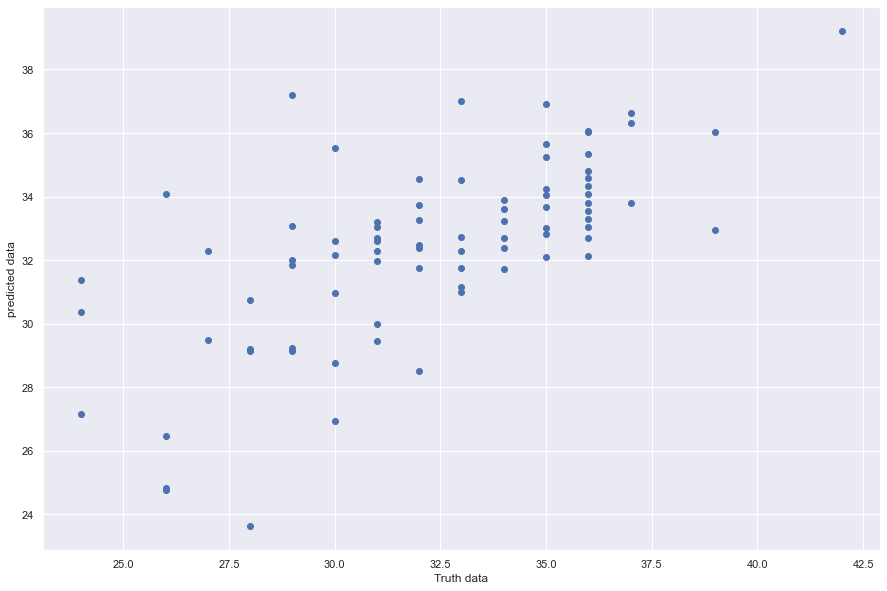

In [159]:
plt.scatter(y_test,reg_pred)
plt.xlabel('Truth data')
plt.ylabel('predicted data')

In [160]:
#rediduals

In [161]:
residuals = y_test - reg_pred

In [162]:
residuals

46    -2.840632
226   -4.082867
181    2.704912
116    1.241458
124   -0.246849
         ...   
127   -0.236261
242   -7.373266
208   -4.001972
102    3.070165
78     2.442408
Name: Temperature, Length: 81, dtype: float64

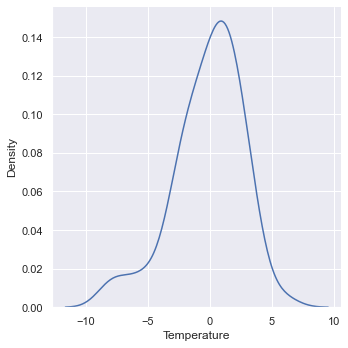

In [165]:
sns.displot(residuals,kind = 'kde')

In [166]:
#scatter plot with predictions and residuals

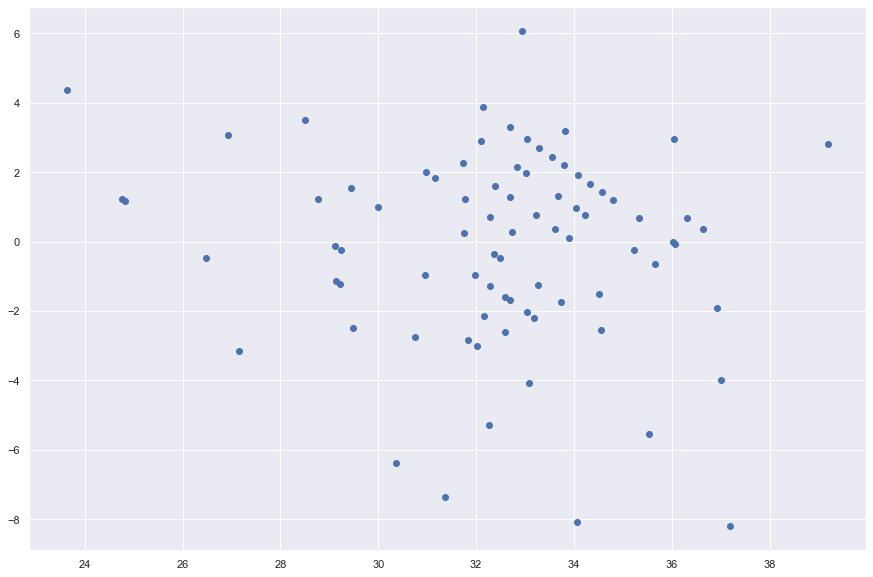

In [168]:
plt.scatter(reg_pred,residuals)

In [169]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

7.718372490369679
2.1359729920427832
2.7781959056858603


In [170]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.442435458586767


In [173]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.3440417159844318

In [ ]:
#ridge regression

In [172]:
from sklearn.linear_model import Ridge

In [174]:
clf = Ridge()

In [176]:
clf = clf.fit(X_train,y_train)

In [178]:
clf.coef_

array([-0.35859242, -0.22361881, -1.4246319 , -0.71357223, -0.23419537,
        0.96377519,  0.02101355,  0.62937949,  0.10421058,  0.21661456,
       -0.22339104,  0.23878478])

In [179]:
clf.intercept_

32.074074074074076

In [181]:
c_pred = clf.predict(X_test)

In [183]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

7.718372490369679
2.1359729920427832
2.7781959056858603


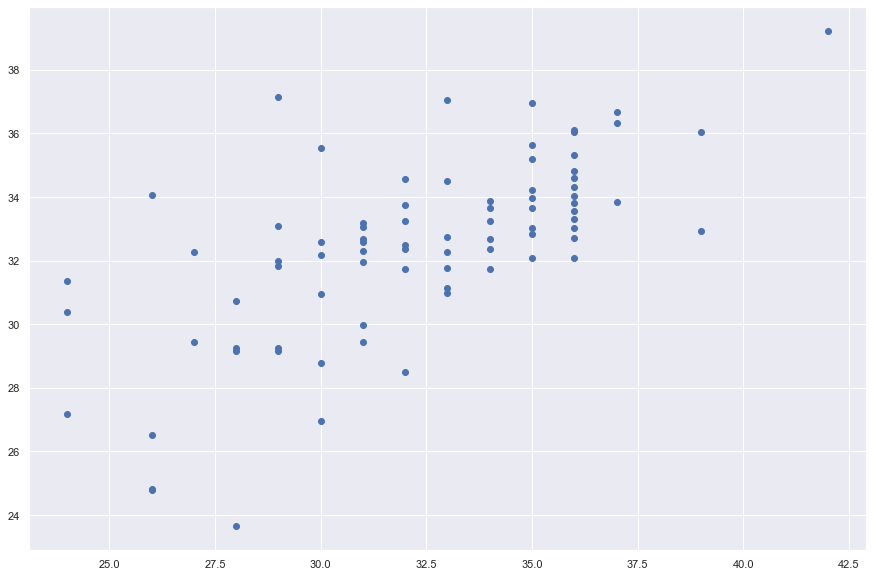

In [184]:
plt.scatter(y_test,c_pred)

In [185]:
from sklearn.metrics import r2_score
score=r2_score(y_test,c_pred)
print(score)

0.4437504153946923


In [187]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.34558872399375573

In [ ]:
#Elastic regression

In [193]:
>>> from sklearn.linear_model import ElasticNet
>>> from sklearn.datasets import make_regression


In [194]:
regrs = ElasticNet()

In [195]:
regrs

ElasticNet()

In [197]:
ereg = regrs.fit(X_train,y_train)

In [198]:
ereg.coef_

array([-0.        , -0.        , -0.77155493, -0.27327033, -0.02945645,
        0.70980198,  0.11177449,  0.        ,  0.20914599,  0.04593431,
        0.12829249,  0.        ])

In [199]:
ereg.intercept_

32.074074074074076

In [201]:
e_pred = ereg.predict(X_test)

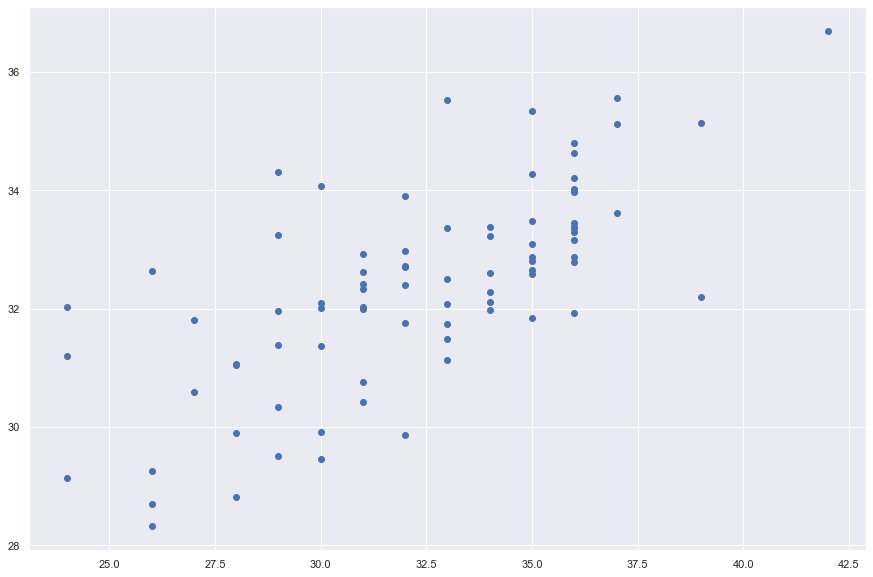

In [202]:
#Assumptions
plt.scatter(y_test,e_pred)

In [204]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,e_pred))
print(mean_absolute_error(y_test,e_pred))
print(np.sqrt(mean_squared_error(y_test,e_pred)))

7.918267418307838
2.279648251186519
2.813941616009088


In [ ]:
#COMPLETED